In [132]:
import os
import seaborn as sns
sns.set(style="darkgrid")
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import re
import Extract 

# Extracción de datos

In [2]:
url="https://datos.madrid.es/portal/site/egob/menuitem.ac61933d6ee3c31cae77ae7784f1a5a0/?vgnextoid=00149033f2201410VgnVCM100000171f5a0aRCRD&mgmtid=374512b9ace9f310VgnVCM100000171f5a0aRCRD&search=keyword/trafico&preview=full&format=json"
os.chdir(r"..\\Data")
directory=os.curdir
Extract.extrae_datos_ayuntamiento(url,directory,1,"accidentes")

url='https://datos.madrid.es/egob/catalogo/keyword/alcoholemia.json'
Extract.extrae_datos_ayuntamiento(url,directory,0,"policia")

In [3]:

merged_data=Extract.carga_accidentes(directory)
pruebas_alcoholemia=Extract.carga_informes_policiales(directory)

In [8]:
#Trasnformaciones
df_obj = merged_data.select_dtypes(['object'])
merged_data.LESIVIDAD=merged_data.LESIVIDAD.apply(lambda x:x[:2]);
merged_data['ANO']=merged_data.FECHA.apply(lambda x:x.year)

def media_edades(rango):
    m = re.findall('\d{2}', rango)
    m=[int(edad) for edad in m]
    try:
        media_edades=sum(m)/len(m)
    except(ZeroDivisionError):
        media_edades=0
    return media_edades

merged_data["Edad"]=merged_data["Tramo Edad"].apply(lambda x:media_edades(x))

# Objetivos e indicadores del Segundo Plan de Seguridad 2012-2020


En la tabla siguiente, extraida del [Segundo Plan de Seguridad vial 2012-2020]("https://www.madrid.es/UnidadesDescentralizadas/UDCMovilidadTransportes/ACONSULTAR/PlanSeguridadVial/PlanSegVial2012-2020.pdf"), se reflejan los indicadores que se van a utilizar para medir la efectividad de las medidas que el Ayuntamiento de Madrid ha implementado desde 2010 para alcanzar los objetivos marcados por el plan.

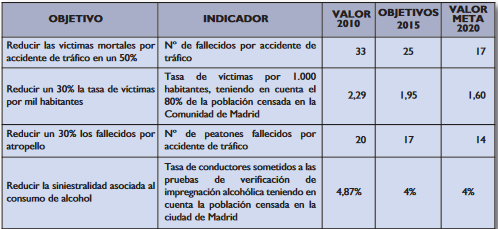

In [9]:
from IPython.display import display, Image
display(Image(filename='../img/Objetivos.png'))

* Reducir las víctimas mortales poraccidente de tráfico en un 50%


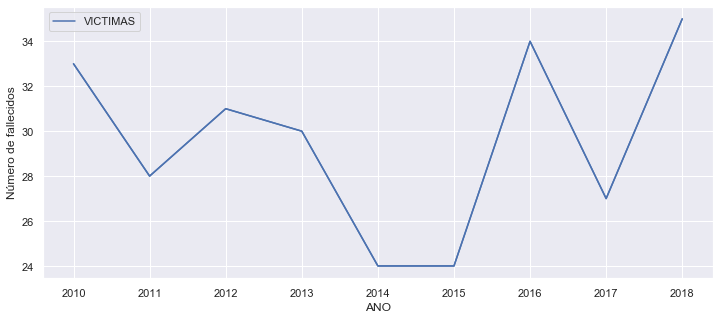

In [40]:
filtered_data=merged_data[(merged_data['LESIVIDAD'].isin(['MT']))]
filtered_data=filtered_data.drop_duplicates(subset='Nº PARTE',keep='first')
pt=pd.pivot_table(data=filtered_data,index='ANO',values='VICTIMAS',aggfunc='count');
figure=plt.figure(figsize=(12,5))

plt.ylabel('Número de fallecidos')
plt.xlabel('Año')
plt.plot(pt);

sns.lineplot(data=pt,style="event")


Este idnicador nos dice que las metas propuestas para el año 2015 se alcanzaron al llegar a un número de fallecidos menor de 25, sin embargo en el año 2015 el número de fallecidos aumento y en 2018 el número de fallecidos alcanzo el máximo del periodo estudiado situandose por encima del valor de 2010.

* Reducir un 30% la tasa de víctimas por mil habitantes

,VICTIMAS,vict_mil
ANO,,
2010,11845,2.313477
2011,12029,2.349414
2012,11824,2.309375
2013,11928,2.329687
2014,12434,2.428516
2015,12453,2.432227
2016,12774,2.494922
2017,13124,2.563281
2018,13430,2.623047


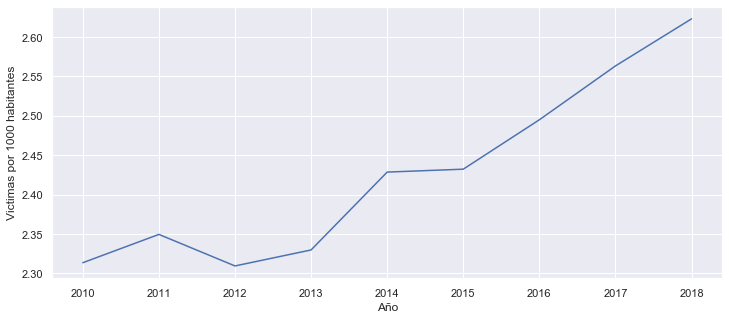

In [43]:
def victimas_mil_habitantes(num_victimas):
    poblacion=6400000*0.8
    victimas_mil_habitantes=num_victimas/(poblacion/1000)
    return victimas_mil_habitantes                       
victimas_mil_habitantes(10000)

filtered_data=merged_data.drop_duplicates(subset='Nº PARTE',keep='first')
pt=pd.pivot_table(data=filtered_data,index='ANO',values='VICTIMAS',aggfunc='sum');

pt['vict_mil']=pt['VICTIMAS'].apply(lambda x:victimas_mil_habitantes(x))
figure=plt.figure(figsize=(12,5))
plt.ylabel('Victimas por 1000 habitantes')
plt.xlabel('Año')

sns.lineplot(data=pt['vict_mil'],style="event")
pt

Según los indicadores este indicador debería de presentar una tendencia descendente si la tasa de accidentes por cada mil habitantes hubiera descendido sin embargo el indicador muestra una tendencia ascendente lo que inidica que no sólo no se ha reducido el número de accidentes sino que ha aumentado desde el año 2013 de forma sostenida hasta el año 2018.

* Reducir el número de victimas mortales producidas por atropello

,VICTIMAS
ANO,
2010,26
2011,18
2012,26
2013,39
2014,13
2015,12
2016,20
2017,21
2018,19


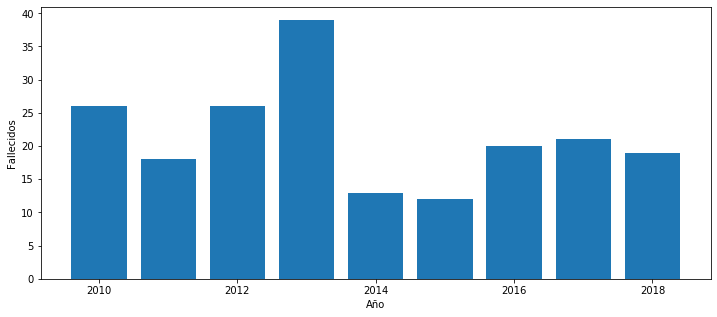

In [10]:
filtered_data=merged_data[(merged_data['TIPO ACCIDENTE'].str.match('ATROPELLO')) & (merged_data['LESIVIDAD'].isin(['MT']))]
plt.figure(figsize=(12,5))
pt=pd.pivot_table(data=filtered_data,index='ANO',values='VICTIMAS',aggfunc='sum');

plt.bar(height=pt['VICTIMAS'],x=pt.index)
plt.ylabel('Fallecidos')
plt.xlabel('Año')
pt

En el caso de los atropellos con resultado de muerte el objetivo para el año 2020 era reducirlo hasta 17 fallecidos por año, hay una clara mejora de este indicador. Desde el año 2013 en el que se alcanzó el máximo del periodo la tendencia ha sido descendente situándose el número de fallecidos pos atropello a 19 en 2018. 

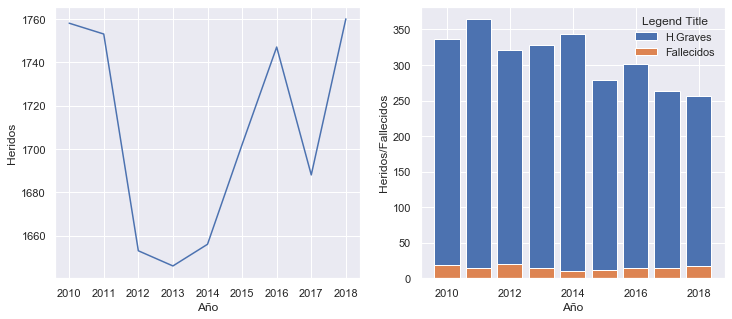

In [58]:

filtered_data=merged_data[(merged_data['TIPO ACCIDENTE'].str.match('ATROPELLO')) & (merged_data['LESIVIDAD'].isin(['HG','MT','HL']))]
filtered_data=filtered_data.drop_duplicates(subset='Nº PARTE',keep='first')

plt.figure(figsize=(12,5))
ax=plt.subplot(121)
pt=pd.pivot_table(data=filtered_data,index='ANO',values='VICTIMAS',aggfunc='sum');
ax.set_xlabel('Año')
ax.set_ylabel('Heridos')
plt.plot(pt)

pt=pd.pivot_table(data=filtered_data,index='ANO',values='VICTIMAS',columns='LESIVIDAD',aggfunc='count')
ax=plt.subplot(122)
ax.set_xlabel('Año')
ax.set_ylabel('Heridos/Fallecidos')

ax.bar(height=pt.HG,x=pt.index,align='center',label='H.Graves')
ax.bar(height=pt.MT,x=pt.index,align='center',label='Fallecidos')
ax.legend(loc="upper right", title="Legend Title", frameon=False)


Un análisis más detallado de los atropeyos nos dice que aunque el número de atropellos ha aumentado desde 2013 la lesividad de estos accidentes se ha reducido, disminuyento el número de heridos graves así como el de fallecidos.

* Reducir los accidentes producidos por el consumo del alcohol

AÑO
2014    181341
2015    165663
2016    172998
2017    202683
2018    158988
2019         0
Name: N_PRUEBAS, dtype: int64

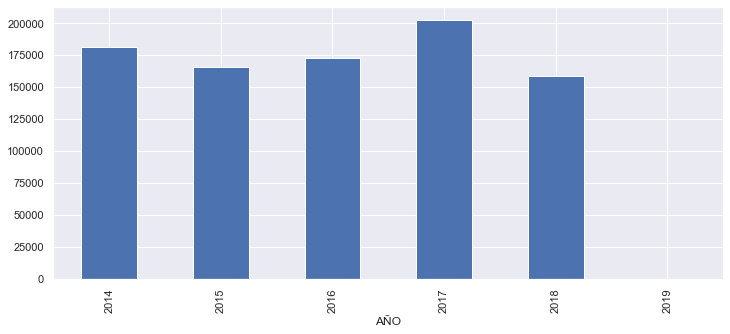

In [82]:
plt.figure(figsize=(12,5))
pruebas_alcoholemia_año=pruebas_alcoholemia.groupby(by='AÑO').sum()['N_PRUEBAS']

ax=pruebas_alcoholemia_año.plot(kind='bar')
pruebas_alcoholemia_año


El número de pruebas de alcolemía se ha mantenido más o menos constante desde el año 2014

# Otros análisis

count    147246.000000
mean         39.618900
std          12.829902
min          19.000000
25%          27.000000
50%          37.000000
75%          47.000000
max          74.000000
Name: Edad, dtype: float64

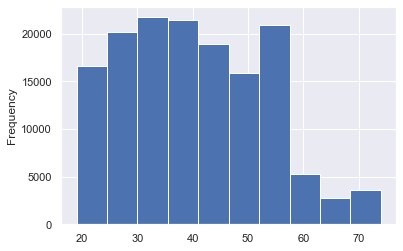

In [86]:
conductores=merged_data[(merged_data['TIPO PERSONA']=='CONDUCTOR') & (merged_data['Edad']>18)]

conductores['Edad'].plot(kind='hist')
conductores['Edad'].describe()

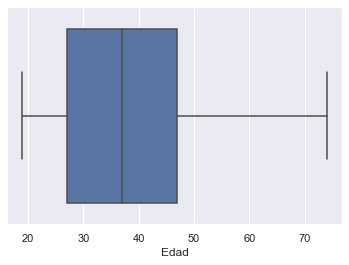

In [84]:
sns.boxplot(conductores['Edad'])

En los gráficos anteriores se analizan la distribución de las edades de los conductores implicados en en accidentes. Se observa que la distribución tiene una asimetria hacía la izquierda alargandose hacía las edades más altas lo que no sorprende al haber menos conductores con edades avanzadas. La edad media de los conductores que sufren un accidente esta entre los 30 y los cuarenta años, mediante estas graficas también observamos que no hay una gran concentración de conductores jovenes implicados en accidentes.

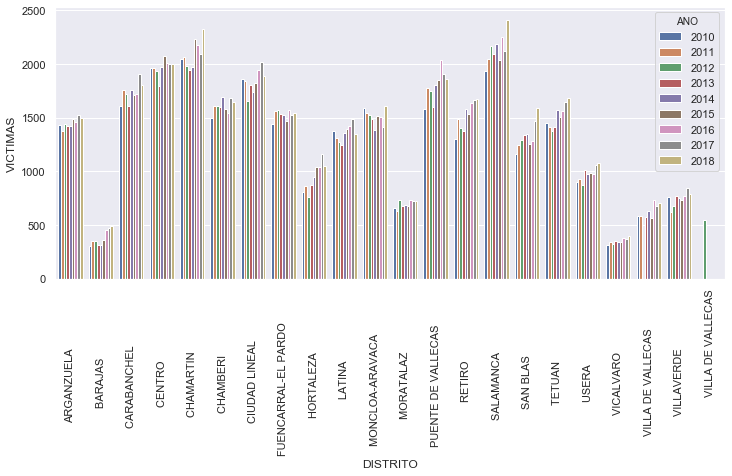

In [128]:
plt.figure(figsize=(12,5))

accidentes_distrito=merged_data.groupby(by=['ANO','DISTRITO']).count()
accidentes_distrito=accidentes_distrito.reset_index()
accidentes_distrito=accidentes_distrito[['ANO','DISTRITO','VICTIMAS']]
#accidentes_distrito=pd.pivot_table(data=accidentes_distrito,index='DISTRITO',values='VICTIMAS',columns='ANO',aggfunc='sum')
accidentes_distrito
plot=sns.barplot(x='DISTRITO',y='VICTIMAS',data=accidentes_distrito,hue='ANO')
loc, labels = plt.xticks()
plot.set_xticklabels(labels, rotation=90);